<a href="https://colab.research.google.com/github/dhrubo-018/AI_Project/blob/master/Titanic_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import os

# Loading Data
I have loaded the data from my github repository.

In [ ]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dhrubo-018/Resources/master/titanic_train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data = pd.read_csv("https://raw.githubusercontent.com/dhrubo-018/Resources/005cf362872c18be388c6e013fec3d43f1822f49/titanic_test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train_data.shape  #checking number of rows and columns 

(891, 12)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_data.describe(include='all').T  #for peliminary numerical analysis on the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [ ]:
test_data.shape

(418, 11)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# **Data Cleaning**
Adding missing values and dropping redundant columns.

In [ ]:
# We finda the columns that have null values
train_data.isnull().sum()   

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Removing Nulls: As we can see 'Age', 'Embarked' columns in both data sets have null values. 'Fare' column in test data set has a missing value too. To fill up this misssing values I have used Mode of each column as this value has the highest frequency, so it is more likely that the missing data is the Mode value itself or nearer to it.

In [ ]:
#Making a copy of the train data set
dummy_train_data = train_data.copy()

In [ ]:
#Making a copy of the test data set
dummy_test_data = test_data.copy()

We fill the missing values of 'Age' column in both data sets.

In [ ]:
# Finding modal value
dummy_train_data['Age'].mode()[0]

24.0

In [ ]:
# Replacing null values with the modal value
dummy_train_data.fillna({'Age' : dummy_train_data['Age'].mode()[0]}, inplace=True)
dummy_train_data['Age'].isnull().values.any()   #tests if any null values are left in the column

False

In [ ]:
# Finding modal value
dummy_test_data['Age'].mode()[0]

21.0

In [ ]:
# Replacing null values with the modal value
dummy_test_data.fillna({'Age' : dummy_test_data['Age'].mode()[0]}, inplace=True)
dummy_test_data['Age'].isnull().values.any()

False

We fill up the missing values of 'Embarked' column in the training data set. Test data has no Null value in this column.

In [ ]:
dummy_train_data['Embarked'].mode()[0]

'S'

So, most people got on board from the Southampton port. We fill up the 2 missing values with 's'.

In [ ]:
dummy_train_data.fillna({'Embarked' : dummy_train_data['Embarked'].mode()[0]}, inplace = True)
dummy_train_data['Embarked'].isnull().values.any()

False

'Fare' column in test data set has 2 missing values. We fill them up with this column's modal value.

In [ ]:
dummy_test_data['Fare'].mode()[0]

7.75

In [ ]:
dummy_test_data.fillna({'Fare' : dummy_test_data['Fare'].mode()[0]}, inplace = True)
dummy_test_data['Fare'].isnull().values.any()

False

In [ ]:
dummy_train_data['Cabin'].isnull().sum()

687

In [ ]:
dummy_test_data['Cabin'].isnull().sum()

327

We see that the 'Cabin' column has a lot of missing values. It musn't be filled with assumed values. Besides Cabin is non-numerical data which doesn't seem to have a direct effect to our problem. So we will drop this column from both data sets.

In [ ]:
dummy_train_data.drop(['Cabin'], axis=1, inplace = True)
dummy_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
dummy_test_data.drop(['Cabin'], axis=1, inplace = True)
dummy_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
#Checking for remaining null values
dummy_train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
dummy_test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We also drop the 'Name' and 'Ticket' column. Both this column only identifies the person which 'PassengerId' already does. So I have decided to drop these columns.

In [ ]:
dummy_train_data.drop(['Name', 'Ticket'], axis = 1, inplace = True)
dummy_train_data.shape

(891, 9)

In [ ]:
dummy_test_data.drop(['Name', 'Ticket'], axis = 1, inplace = True)
dummy_test_data.shape

(418, 8)

Upon running the model I've found that the 'Fare' column doesn't add anything to the data set. So we are going to drop this too.

In [ ]:
dummy_train_data.drop(['Fare'], axis = 1, inplace = True)
dummy_train_data.shape

(891, 8)

In [ ]:
dummy_test_data.drop(['Fare'], axis = 1, inplace = True)
dummy_test_data.shape

(418, 7)

# Feature Engineering
Converting categorical data to numerical data.

In [ ]:
dummy_train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S


In [ ]:
#Calculating frequency of survived persons for each categorical data
dummy_train_data[['Pclass', 'Survived']].groupby(['Pclass']).sum().sort_values(by = 'Survived')

,Survived
Pclass,
2,87
3,119
1,136


In [ ]:
dummy_train_data[['Sex', 'Survived']].groupby(['Sex']).sum().sort_values(by = 'Survived')

,Survived
Sex,
male,109
female,233


In [ ]:
dummy_train_data[['Embarked', 'Survived']].groupby(['Embarked']).sum().sort_values(by = 'Survived')

,Survived
Embarked,
Q,30
C,93
S,219


Clearly the categorical data namely 'Pclass', 'Sex' and 'Embarked' have influence on the outcome. We will assign numerical data points for them and add to the data set.
we use pandas' get_dummies function for this.

In [ ]:
categories = ['Pclass', 'Sex', 'Embarked']
dummy_train_data2 = pd.get_dummies(dummy_train_data, columns = categories)
dummy_train_data2.head()

,PassengerId,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,0,0,1,0,1,0,0,1
1,2,1,38.0,1,0,1,0,0,1,0,1,0,0
2,3,1,26.0,0,0,0,0,1,1,0,0,0,1
3,4,1,35.0,1,0,1,0,0,1,0,0,0,1
4,5,0,35.0,0,0,0,0,1,0,1,0,0,1


In [ ]:
#dropping 'Sex_male' column because it becomes redundant as 0 in 'Sex_female' represents male
dummy_train_data2.drop('Sex_male', axis = 1, inplace = True)    
dummy_train_data2.head()

,PassengerId,Survived,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,0,0,1,0,0,0,1
1,2,1,38.0,1,0,1,0,0,1,1,0,0
2,3,1,26.0,0,0,0,0,1,1,0,0,1
3,4,1,35.0,1,0,1,0,0,1,0,0,1
4,5,0,35.0,0,0,0,0,1,0,0,0,1


We do the same for test data.

In [ ]:
dummy_test_data2 = pd.get_dummies(dummy_test_data, columns=categories)
dummy_test_data2.head()

,PassengerId,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,0,0,1,0,1,0,1,0
1,893,47.0,1,0,0,0,1,1,0,0,0,1
2,894,62.0,0,0,0,1,0,0,1,0,1,0
3,895,27.0,0,0,0,0,1,0,1,0,0,1
4,896,22.0,1,1,0,0,1,1,0,0,0,1


In [ ]:
dummy_test_data2.drop('Sex_male', axis = 1, inplace = True)
dummy_test_data2.head()

,PassengerId,Age,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,Embarked_Q,Embarked_S
0,892,34.5,0,0,0,0,1,0,0,1,0
1,893,47.0,1,0,0,0,1,1,0,0,1
2,894,62.0,0,0,0,1,0,0,0,1,0
3,895,27.0,0,0,0,0,1,0,0,0,1
4,896,22.0,1,1,0,0,1,1,0,0,1


# Data Visualization
Looking at data visualization to find any correlation between values.

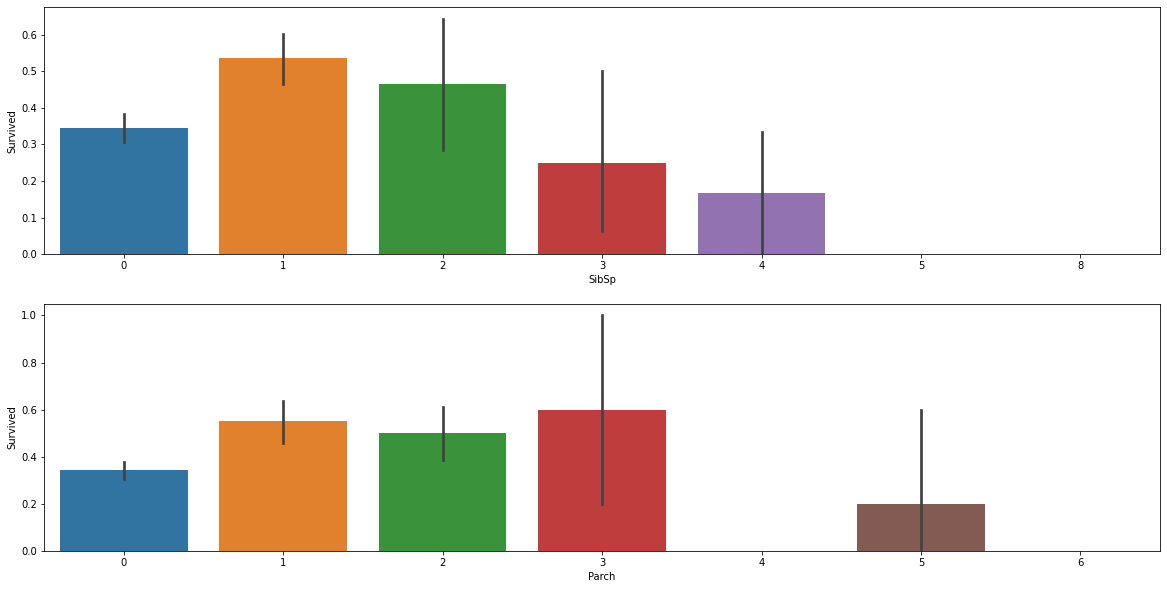

In [ ]:
plt.figure(figsize = (20, 10))

plt.subplot(211)
sns.barplot(x = 'SibSp', y = 'Survived', data = dummy_train_data2)

plt.subplot(212)
sns.barplot(x = 'Parch', y = 'Survived', data = dummy_train_data2)

It seems that having a family member on the ship might be a factor of survival rate. We'll create a column containing the number of family members onboard with that person. 

In [ ]:
dummy_train_data2['FamMembers'] = dummy_train_data2['SibSp'] + dummy_train_data2['Parch']

In [ ]:
#We drop the 'SibSp' and 'Parch' columns as they are already merged in the 'FamMembers' column
dummy_train_data2.drop(['SibSp', 'Parch'], axis = 1, inplace = True)

In [ ]:
dummy_train_data2.head()

,PassengerId,Survived,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,Embarked_Q,Embarked_S,FamMembers
0,1,0,22.0,0,0,1,0,0,0,1,1
1,2,1,38.0,1,0,0,1,1,0,0,1
2,3,1,26.0,0,0,1,1,0,0,1,0
3,4,1,35.0,1,0,0,1,0,0,1,1
4,5,0,35.0,0,0,1,0,0,0,1,0


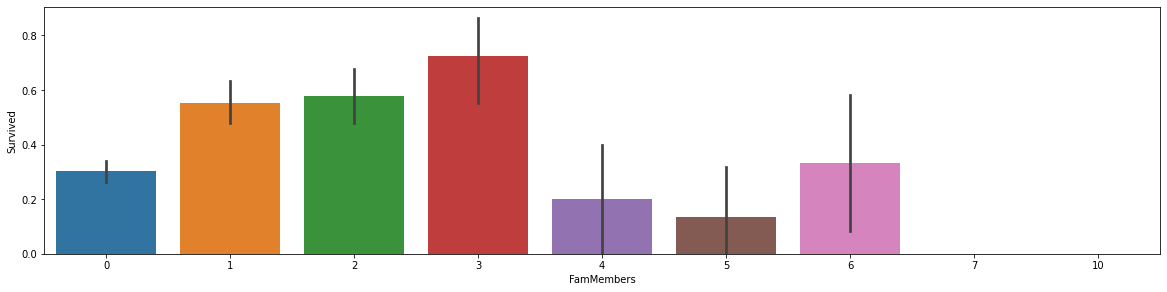

In [ ]:
plt.figure(figsize = (20, 10))

plt.subplot(211)
sns.barplot(x = 'FamMembers', y = 'Survived', data = dummy_train_data2)

We'll also create the 'FamMembers' column for the test data.

In [ ]:
dummy_test_data2['FamMembers'] = dummy_test_data2['SibSp'] + dummy_test_data2['Parch']
dummy_test_data2.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
dummy_test_data2.head()

,PassengerId,Age,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,Embarked_Q,Embarked_S,FamMembers
0,892,34.5,0,0,1,0,0,1,0,0
1,893,47.0,0,0,1,1,0,0,1,1
2,894,62.0,0,1,0,0,0,1,0,0
3,895,27.0,0,0,1,0,0,0,1,0
4,896,22.0,0,0,1,1,0,0,1,2


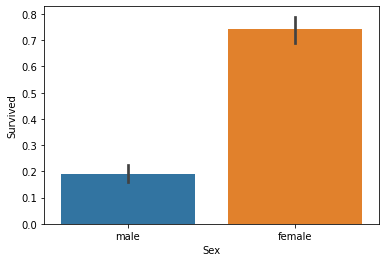

In [ ]:
plt.subplot(111)
sns.barplot(x = 'Sex', y='Survived', data  = train_data)

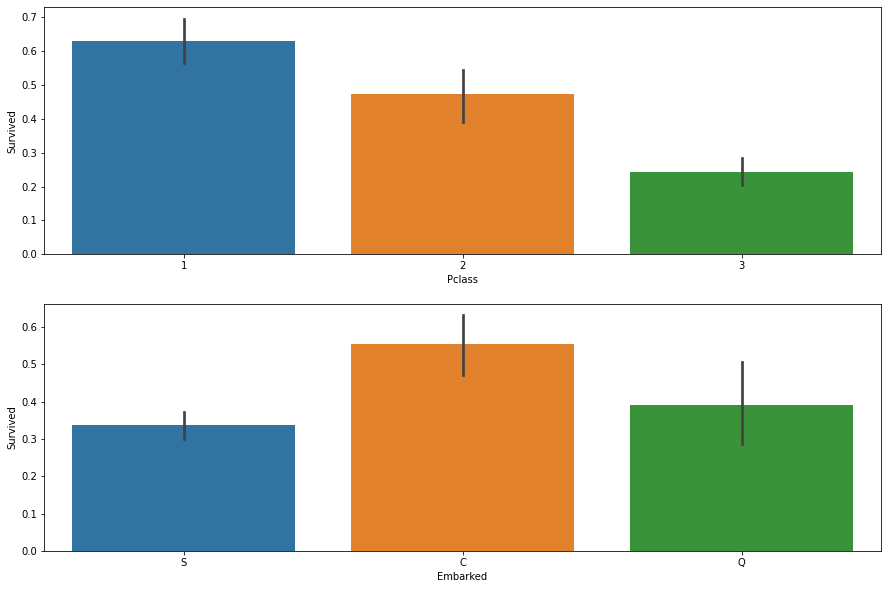

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(211)
sns.barplot(x = 'Pclass', y = 'Survived', data = train_data)

plt.subplot(212)
sns.barplot(x = 'Embarked', y = 'Survived', data = train_data)


# Building and Training a Logistic Regression Model

Splitting the train data that will help measure accuracy of model

In [ ]:
y = dummy_train_data2['Survived']
X = dummy_train_data2.drop(['Survived'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Building the model

In [ ]:
logRegModel = LogisticRegression(solver='newton-cg', penalty='l2', C=0.02, max_iter=10000)  #parameters were manually tested and optimized
logRegModel.fit(X_train, y_train)

prediction_on_X_test = logRegModel.predict(X_test)

Checking accuracy of the model based on predicted values of split train data

In [ ]:
accuracy_score(y_test, prediction_on_X_test)

0.7653631284916201

In [ ]:
confusion_matrix(y_test, prediction_on_X_test)

array([[94,  5],
       [37, 43]])

Predicting with Kaggle given test data set

In [ ]:
predictions = logRegModel.predict(dummy_test_data2)

In [ ]:
output = pd.DataFrame({'PassengerId': dummy_test_data2.PassengerId, 'Survived': predictions})
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


Saving output for Kaggle submission.

In [ ]:
output.to_csv('Submissions.csv', index=False)